Mounted at /content/drive
Found 384 images belonging to 4 classes.
Found 100 images belonging to 4 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
12/12 [==============================] - 348s 29s/step - loss: 5.7302 - accuracy: 0.3203 - val_loss: 0.7762 - val_accuracy: 0.6458
Epoch 2/10
12/12 [==============================] - 325s 28s/step - loss: 1.5169 - accuracy: 0.5547 - val_loss: 0.2840 - val_accuracy: 0.9167
Epoch 3/10
12/12 [==============================] - 326s 28s/step - loss: 0.6593 - accuracy: 0.7422 - val_loss: 0.2773 - val_accuracy: 0.9271
Epoch 4/10
12/12 [==============================] - 323s 27s/step - loss: 0.5031 - accuracy: 0.8385 - val_loss: 0.2430 - val_accuracy: 0.9479
Epoch 5/10
12/12 [==============================] - 322s 27s/step - loss: 0.4198 - accuracy: 0.8516 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 6/10
12/12 [==============================] - 322s 27s/step - loss: 0.3409 - accuracy: 0.8854 - val_loss: 0.178

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


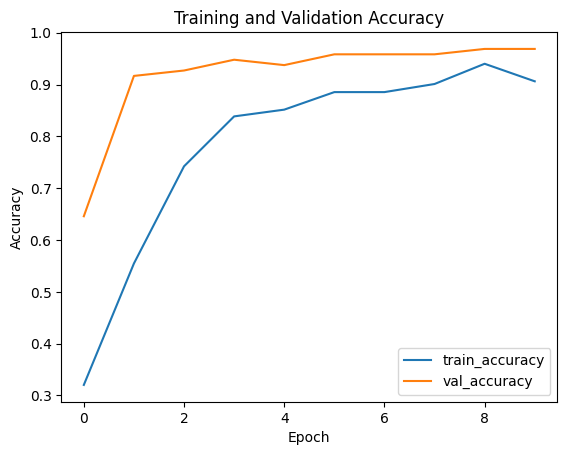

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
train_data_dir = '/content/drive/MyDrive/dataset/training_data'
test_data_dir = '/content/drive/MyDrive/dataset/testing_data'

# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Save the model
model.save('/content/drive/MyDrive/vgg_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


4/4 [==============================] - 61s 14s/step - loss: 0.1529 - accuracy: 0.9700
Test Accuracy: 0.9700000286102295
